# CODIGO Simulador de Prisma Rectangular - Tonny Gualdron

Corra todas las lineas de codigo hasta el siguiente titulo antes de ejecutar la simualción.

In [1]:
%pylab inline
import math
from IPython.display import display, clear_output

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def rotarVertices(a, thetaDeg):
    theta = radians(thetaDeg)
    r = (1/sqrt(2))*a
    ver3 = [r*cos(theta+(pi/2)),r*sin(theta+(pi/2))]
    ver2 = [r*cos(theta),r*sin(theta)]
    ver1 = [r*cos(theta+((3*pi)/2)),r*sin(theta+((3*pi)/2))]
    return [ver1,ver2,ver3,ver1]

In [3]:
def normaVector(vec):
    return sqrt(pow(vec[0],2)+pow(vec[1],2))

In [4]:
def uniVector(vec):
    return [vec[0]/normaVector(vec),vec[1]/normaVector(vec)]

In [5]:
def vectoresPrisma(ver):
    vec1 = [(ver[1][0]-ver[0][0]),(ver[1][1]-ver[0][1])]
    vec2 = [(ver[2][0]-ver[1][0]),(ver[2][1]-ver[1][1])]
    vec3 = [(ver[0][0]-ver[2][0]),(ver[0][1]-ver[2][1])]
    return [uniVector(vec1),uniVector(vec2),uniVector(vec3)]

In [6]:
def inter(vec1,ver1,vec2,ver2):
    if(vec1[0] != 0 and vec2[0] != 0):
        a1 = vec1[1]/vec1[0]
        a2 = vec2[1]/vec2[0]
        b1 = ((-1*a1*ver1[0])+ver1[1])
        b2 = ((-1*a2*ver2[0])+ver2[1])
        x = (b2-b1)/(a1-a2)
        y = a1*x + b1
    else:
        x = ver1[0]
        y = ver2[1]
    return [x,y]

In [7]:
def vectorNormal(vec):
    return [vec[1],-vec[0]]

In [8]:
def vectorNormalInv(vec):
    return [-vec[1],vec[0]]

In [9]:
def productoPunto(vec1,vec2):
    return (vec1[0]*vec2[0]) + (vec1[1]*vec2[1])  

In [10]:
def anguloVectores(vec1,vec2):
    return arccos(productoPunto(vec1,vec2)/(normaVector(vec1)*normaVector(vec2)))

In [11]:
def reflexion(vec,normal):
    pro = productoPunto(vec,normal)
    x = vec[0] -(2*pro*normal[0])
    y = vec[1] - (2*pro*normal[1])
    return [x,y]

In [12]:
def refraccion(n1,n2,vec,normal):
    pro = productoPunto(vec,normal)
    pro2 = sqrt(pow(n2,2)-pow(n1,2)+pow(productoPunto(vec,normal),2))
    x = vec[0] - (pro*normal[0]) + (pro2*normal[0])
    y = vec[1] - (pro*normal[1]) + (pro2*normal[1])
    return [x,y]

In [13]:
def Rp(n1,n2,theta1,theta2):
    theta11 = radians(theta1)
    theta22 = radians(theta2)
    return ((n1*cos(theta22))-(n2*cos(theta11)))/((n1*cos(theta22))+(n2*cos(theta11)))

In [14]:
def Tp(n1,n2,theta1,theta2):
    theta11 = radians(theta1)
    theta22 = radians(theta2)
    return (2*n1*cos(theta11))/((n1*cos(theta22))+(n2*cos(theta11)))

In [15]:
def anguloCritico(n1,n2):
    return degrees(arcsin(n2/n1))

In [16]:
def simular(a,n1,n2,theta):
    posiciones = []
    angulos = []
    vec = []
    foto = [[0,0],[2*a*cos(radians(2*theta)),2*a*sin(radians(2*theta))]]
    
    vecLaser = [-1,0]
    verLaser = [2*a,0]
    posiciones.append(verLaser)
    vec.append(vecLaser)
    
    verPrisma = rotarVertices(a, theta)
    vecPrisma = vectoresPrisma(verPrisma)
    
    posiciones.append(inter(vec[0],posiciones[0],vecPrisma[0],verPrisma[0]))
    vec.append(refraccion(n1,n2,vec[0],vectorNormalInv(vecPrisma[0])))
    angulos.append(degrees(anguloVectores(vec[0],vectorNormalInv(vecPrisma[0]))))
    angulos.append(degrees(anguloVectores(vec[1],vectorNormalInv(vecPrisma[0]))))
    
    posiciones.append(inter(vec[1],posiciones[1],vecPrisma[2],verPrisma[2]))
    vec.append(reflexion(vec[1],vectorNormal(vecPrisma[2])))
    angulos.append(degrees(anguloVectores(vec[1],vectorNormal(vecPrisma[2]))))
    
    if(angulos[2] < anguloCritico(n2,n1)):
        vecT = refraccion(n2,n1,vec[1],vectorNormal(vecPrisma[2]))
        angulos.append(degrees(anguloVectores(vecT,vectorNormal(vecPrisma[2]))))
    else:
        angulos.append(nan)
        
    angulos.append(degrees(anguloVectores(vec[2],vectorNormalInv(vecPrisma[2]))))
    
    posiciones.append(inter(vec[2],posiciones[2],vecPrisma[1],verPrisma[1]))
    vec.append(refraccion(n2,n1,vec[2],vectorNormal(vecPrisma[1])))
    angulos.append(degrees(anguloVectores(vec[2],vectorNormal(vecPrisma[1]))))
    angulos.append(degrees(anguloVectores(vec[3],vectorNormal(vecPrisma[1]))))
    
    m = vec[3][1]/vec[3][0]
    if(theta < 45):
        posiciones.append([2*a,((2*a*m)+((-m*posiciones[3][0])+posiciones[3][1]))])
    elif(theta > 45):
        posiciones.append([-2*a,((-2*a*m)+((-m*posiciones[3][0])+posiciones[3][1]))])
    else: 
        posiciones.append([posiciones[3][0],2*a])
    return [posiciones,angulos,verPrisma,foto]

In [17]:
def plotSimulador(a,n1,n2,inicial,final,paso,tiempo):

    theta = inicial

    fig = plt.figure()
    fig.set_figheight(4)
    fig.set_figwidth(4)

    ax = fig.add_subplot(1, 1, 1) 

    ax.cla()
    display(fig)
    clear_output(wait = True)
    plt.pause(0.001)

    ax.cla()
    display(fig)
    clear_output(wait = True)
    plt.pause(0.001)

    while theta <= final:
        resultado = simular(a,n1,n2,theta)
        posiciones = np.array(resultado[0])
        angulos = np.array(resultado[1])
        verPrisma = np.array(resultado[2])
        foto =  np.array(resultado[3])  
        print('Incidencia '+ str("{:.2f}".format(angulos[0]))
              +'°|Reflexión '+ str("{:.2f}".format(angulos[2]))
              +'|Salida '+ str("{:.2f}".format(angulos[5]))+'°')

        ax.cla()
        ax.plot(posiciones[:,0],posiciones[:,1])
        ax.plot(verPrisma[:,0],verPrisma[:,1])
        #ax.plot(foto[:,0],foto[:,1])
        ax.title.set_text('Angulo rotado '+ str(theta)+'°')
        ax.set_xlim([-a, a])
        ax.set_ylim([-a, a])

        display(fig)
        clear_output(wait = True)
        plt.pause(tiempo)

        theta+=paso

In [18]:
def reflectividad(a,n1,n2,inicial,final,paso):
    refle = []
    ang = []
    theta = inicial

    while theta <= final:
        resultado = simular(a,n1,n2,theta)
        posiciones = np.array(resultado[0])
        angulos = np.array(resultado[1])
        verPrisma = np.array(resultado[2])
        foto =  np.array(resultado[3])
        
        f1=Tp(n1,n2,angulos[0],angulos[1])
        f3=Tp(n2,n1,angulos[5],angulos[6])
        
        if(angulos[2] < anguloCritico(n2,n1)):
            f2 = Rp(n2,n1,theta[2],theta[3])
        else:
            f2 = 1
        
        refle.append([f1,f2,f3,(f1*f2*f3)])
        ang.append(theta)

        theta+=paso
    return [refle,ang]

In [19]:
def plotReflectividad(a,n1,n2,inicial,final,paso):
    resultados = reflectividad(a,n1,n2,inicial,final,paso)
    y = np.array(resultados[0])
    #plot(resultados[1],y[:,0]/max(y[:,0]))
    #plot(resultados[1],y[:,1]/max(y[:,1]))
    #plot(resultados[1],y[:,2]/max(y[:,2]))
    plot(resultados[1],y[:,3]/max(y[:,3]))
    xlabel('Angulo[°]')
    ylabel('Intensidad')

# Simulador de Prisma Rectangular

In [20]:
a = 10 #Tamaño del prisma
n1 = 1 #Indice del medio
n2 = 2.6123 #Indice del prism
inicial = 5 #Angulo en que inicia el prisma en grados [0-90]
final = 85 #Angulo en que finaliza el prisma en grados [0-90]
paso1 = 5 #Paso de simulación rotación 
paso2 = 1 #Paso de la simulación de reflectividad
tiempo = 1 #Tiempo en segundo de actualización entre graficas

Incidencia 40.00°|Reflexión 59.24|Salida 14.24°


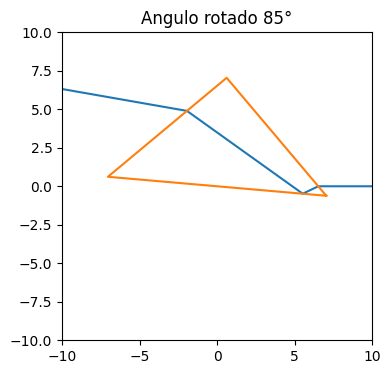

In [21]:
plotSimulador(a,n1,n2,inicial,final,paso1,tiempo)

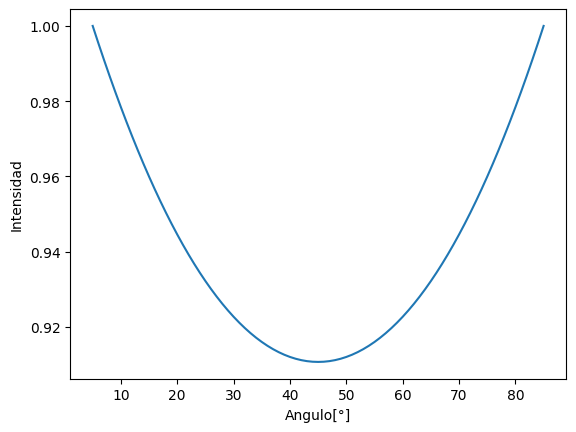

In [22]:
plotReflectividad(a,n1,n2,inicial,final,paso2)